In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

     |████████████████████████████████| 1.0 MB 8.7 MB/s 
     |████████████████████████████████| 6.3 MB 44.3 MB/s 
     |████████████████████████████████| 15.4 MB 65.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/RipGeo01012021_g/RipGeo01012021_g_WGS84.dbf')
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Com01012021_g')
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/ProvCM01012021_g')
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Reg01012021_g')
italia = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/RipGeo01012021_g')

regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

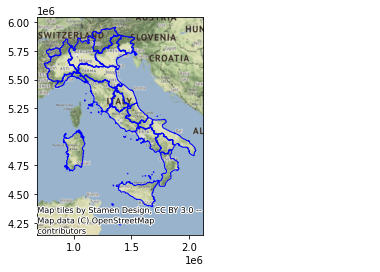

In [ ]:
ax = regioni.to_crs(epsg= 3857).plot(edgecolor='b', facecolor='none')
ctx.add_basemap(ax)

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa

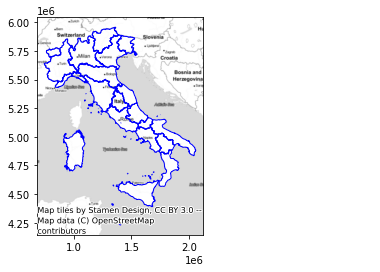

In [ ]:
import xyzservices.providers as xyz
ax = regioni.to_crs(epsg= 3857).plot(edgecolor='b', facecolor='none')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

3. visualizzare le province della Lombardia su una mappa di contextily

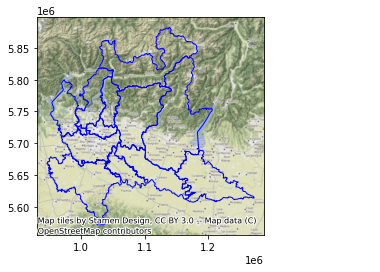

In [ ]:
import matplotlib.pyplot as plt
lombardia= regioni[regioni.DEN_REG == 'Lombardia']

province_lomb= province[province.within(lombardia.geometry.squeeze())]

ax = province_lomb.to_crs(epsg= 3857).plot(edgecolor='b', facecolor='none')
ctx.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

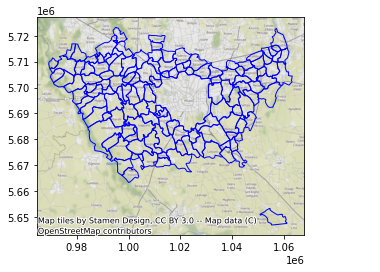

In [ ]:
import matplotlib.pyplot as plt
milano= province[province.DEN_UTS == 'Milano']

comuni_mil= comuni[comuni.within(milano.geometry.squeeze())]

ax = comuni_mil.to_crs(epsg= 3857).plot(edgecolor='b', facecolor='none')
ctx.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 


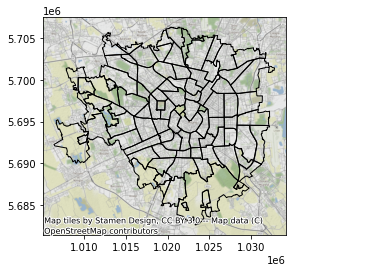

In [ ]:
quart= geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/ds964_nil_wm')
ax = quart.to_crs(epsg=3857).plot(edgecolor='k', facecolor= 'none')
ctx.add_basemap(ax)

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.


In [ ]:
utente = input('inserire una provincia lombarda: ')
if utente in lombardia['DEN_UTS'].tolist():
  print('trovato')
  ax = lombardia[lombardia.touches(lombardia[lombardia.DEN_UTS == utente].geometry.squeeze())].to_crs(epsg=3857)
  ctx.add_basemap(ax)

else:
  print('null')

inserire una provincia lombarda: Milano


KeyError: ignored